插值思路:均值/中位数/众数/临近值/(拉格朗日)插值法...

In [1]:
import numpy as np
import pandas as pd
from  numpy import  nan as NA
'''
fillna函数参数
value           标量值或字典型对象用于填充缺失值
method          插值方法,如果没有其他参数,默认是'ffill'
    method : {‘backfill’, ‘bfill’, ‘pad’, ‘ffill’, None}, default None
        Method to use for filling holes in reindexed Series pad / ffill: propagate last 
        valid observation forward to next valid backfill / bfill: use NEXT valid observation to fill gap
axis            需要填充的轴,默认是axis=0
inplace         修改被调用的对象,而不是生成一个备份
limit           用于前向或后向填充时最大的填充范围
'''
df = pd.DataFrame(np.random.randn(7, 3))
df.iloc[:4, 1] = NA
df.iloc[:2, 2] = NA
df

,0,1,2
0,0.133708,NaN,NaN
1,-0.152254,NaN,NaN
2,0.677750,NaN,1.017885
3,-0.232096,NaN,-1.495759
4,-1.002455,0.869390,0.653912
5,-0.149095,0.578337,-0.816572
6,1.640716,0.775522,-0.564226


In [2]:
df.fillna(0)   # 用0代替缺失值NA

,0,1,2
0,0.133708,0.000000,0.000000
1,-0.152254,0.000000,0.000000
2,0.677750,0.000000,1.017885
3,-0.232096,0.000000,-1.495759
4,-1.002455,0.869390,0.653912
5,-0.149095,0.578337,-0.816572
6,1.640716,0.775522,-0.564226


In [3]:
df.fillna(method='bfill')

,0,1,2
0,0.133708,0.869390,1.017885
1,-0.152254,0.869390,1.017885
2,0.677750,0.869390,1.017885
3,-0.232096,0.869390,-1.495759
4,-1.002455,0.869390,0.653912
5,-0.149095,0.578337,-0.816572
6,1.640716,0.775522,-0.564226


In [4]:
df.fillna(value={1: 0.5, 2: 0}) # 不同的列用不同的填充值进行填充

,0,1,2
0,0.133708,0.500000,0.000000
1,-0.152254,0.500000,0.000000
2,0.677750,0.500000,1.017885
3,-0.232096,0.500000,-1.495759
4,-1.002455,0.869390,0.653912
5,-0.149095,0.578337,-0.816572
6,1.640716,0.775522,-0.564226


In [5]:
df.fillna(0, inplace=True)  # df发生变化
df

,0,1,2
0,0.133708,0.000000,0.000000
1,-0.152254,0.000000,0.000000
2,0.677750,0.000000,1.017885
3,-0.232096,0.000000,-1.495759
4,-1.002455,0.869390,0.653912
5,-0.149095,0.578337,-0.816572
6,1.640716,0.775522,-0.564226


In [6]:
df1 = pd.DataFrame(np.random.randn(6, 3))
df1.iloc[2:, 1] = NA
df1.iloc[4:, 2] = NA
df1

,0,1,2
0,0.286093,1.033250,0.048941
1,1.016756,0.920037,0.973772
2,0.294090,NaN,1.012717
3,-0.393015,NaN,0.105540
4,-0.308137,NaN,NaN
5,-0.683320,NaN,NaN


In [7]:
df1.fillna(method='ffill')

,0,1,2
0,0.286093,1.033250,0.048941
1,1.016756,0.920037,0.973772
2,0.294090,0.920037,1.012717
3,-0.393015,0.920037,0.105540
4,-0.308137,0.920037,0.105540
5,-0.683320,0.920037,0.105540


In [8]:
df1.fillna(method='ffill', limit=2)

,0,1,2
0,0.286093,1.033250,0.048941
1,1.016756,0.920037,0.973772
2,0.294090,0.920037,1.012717
3,-0.393015,0.920037,0.105540
4,-0.308137,NaN,0.105540
5,-0.683320,NaN,0.105540


In [27]:
# 举例
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from scipy.interpolate import  lagrange
import copy

matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

data = pd.Series(np.random.rand(100)*100)
data[3, 6, 33, 56, 45, 66, 80, 90] = np.nan

In [28]:
data_m = data.fillna(data.median()) # 中位数填充缺失值
data_m

0     73.823246
1     54.288379
2     70.292994
3     54.597962
4     62.837052
        ...    
95     7.824852
96    43.958786
97    11.040603
98    72.942227
99    80.668603
Length: 100, dtype: float64

In [29]:
data_la = copy.deepcopy(data)
def La(s, n, k=5):
    y = s.reindex(list(range(n-k, n+1+k)))
    y = y[y.notnull()]
    return lagrange(y.index, list(y))(n)

for i in range(len(data)):
    if data_la .isnull()[i]:
        data_la.iloc[i] = La(data, i)
        print('在', i, '个位置填充缺失值', La(data_la , i))

data_la.dropna(inplace=True)
data_la

在 3 个位置填充缺失值 64.40027512249438
在 6 个位置填充缺失值 96.44978038822546
在 33 个位置填充缺失值 -6.227957725524902
在 45 个位置填充缺失值 6.58740234375
在 56 个位置填充缺失值 97.486328125
在 66 个位置填充缺失值 -728.46875
在 80 个位置填充缺失值 -400.0
在 90 个位置填充缺失值 -13696.0


0     73.823246
1     54.288379
2     70.292994
3     64.400275
4     62.837052
        ...    
95     7.824852
96    43.958786
97    11.040603
98    72.942227
99    80.668603
Length: 100, dtype: float64

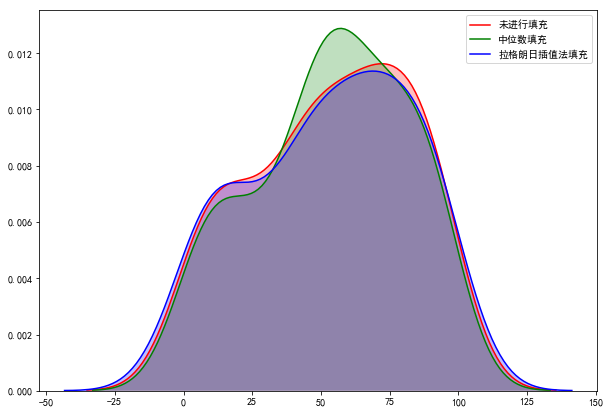

In [30]:
plt.figure(figsize=(10, 7))
ax = plt.subplot(111)
sns.kdeplot(data, shade=True, color="r", label='未进行填充')
sns.kdeplot(data_m, shade=True, color="g", label='中位数填充')
sns.kdeplot(data_la, shade=True, color='b', label='拉格朗日插值法填充')
ax.legend()